In [144]:
import pandas as pd
import numpy as np
from Plotter.aggregation import (
    RowFigureConcatenationReport,
    ColumnFigureConcatenationReport,
)
from Plotter.text import TitleReport

from Plotter.line import *
from Plotter.bar import *
from Plotter.table import *
import datetime

import empyrical as ep

In [145]:
test = pd.read_pickle("New/JPYTest.pkl") 

In [146]:
tickers=[
      'ZF=F', 'ZT=F', 'ZB=F', "ZN=F",
      "ES=F", "YM=F", "NQ=F", "RTY=F",
      "GC=F", "SI=F", "ZC=F", "CL=F", "SB=F", "CT=F",
      "EUR=X", "JPY=X", "GBP=X", 'BRL=X', "MXN=X", "CAD=X"
  ]
ticker = "JPY=X"

In [147]:
# best = [15, 2, 24, 20, 1, 4] #ESF
# best = [15, 24, 3] #Euro
# best = [8, 18, 6, 13, 2, 19] #JPY
# best = [5, 2, 0, 4, 10, 8] # Gold
# best = [13, 23, 24] # YM
aux = {}
aux[f"{ticker}"] = test[0][f"{ticker}"]
aux[f"{ticker}_Real"] = test[0][f"{ticker}_Real"]
aux[f"{ticker}_Date"] = test[0][f"{ticker}_Date"]
test_output = pd.DataFrame(aux).set_index(f"{ticker}_Date")
test_output[f"{ticker}"] = test_output[f"{ticker}"]*0

In [148]:
for k in best:
    test_output[f"{ticker}"] = test_output[f"{ticker}"] + test[k][f"{ticker}"]

test_output[f'{ticker}'] = test_output[f'{ticker}']/len(best)


In [149]:
test_output[f"{ticker}_Real"] = np.exp(test_output[f"{ticker}_Real"])-1
test_output[f"{ticker}"] = np.exp(test_output[f"{ticker}"])-1
win_rate_list = np.sign(test_output[f"{ticker}"]) == np.sign(test_output[f"{ticker}_Real"])
test_output["Returns"] = np.sign(test_output[f"{ticker}"]) * test_output[f"{ticker}_Real"]
test_output.index.rename('date', inplace=True)
test_output.index = pd.to_datetime(test_output.index)
full_returns = test_output[[f'{ticker}_Real', "Returns"]].melt(ignore_index=False, var_name='asset', value_name='Return').reset_index().groupby(['date', 'asset']).sum()['Return']

In [150]:
signs = np.sign(test_output[f"{ticker}"])
signs.value_counts()

 1.0    742
-1.0    130
Name: JPY=X, dtype: int64

In [151]:
win_rate_list.value_counts()


True     485
False    387
dtype: int64

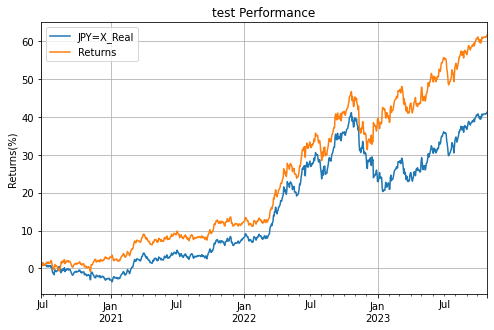

In [152]:
CumulativeReturnsWithBenchmarks.from_returns(full_returns, title='test Performance', ylabel='Returns(%)').plot()

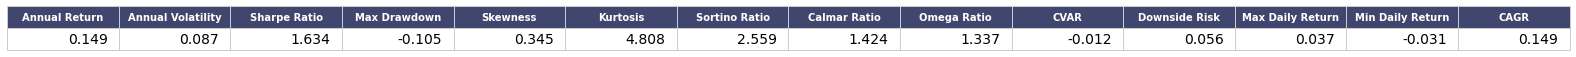

In [153]:
ReturnMetricsTable.from_returns(test_output['Returns'], font_size=10, num_font_size=14).plot()

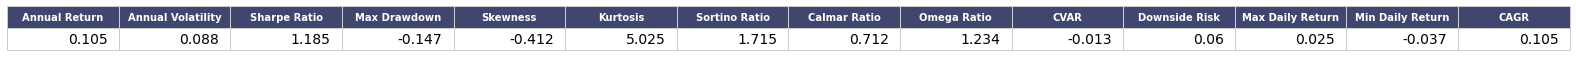

In [154]:
ReturnMetricsTable.from_returns(test_output[f'{ticker}_Real'], font_size=10, num_font_size=14).plot()